# Table of Contents 

* [Imports & Functions](#imports-and-functions)
* [Principal Component Analysis](#PCA)
* [Multiple Linear Regression - Unrestricted](#MLR-unrestricted)
* [Multiple Linear Regression - Restricted](#MLR-restricted)

# Imports & Functions <a class="anchor" id="imports-and-functions"></a>

In [86]:
#Importing packages 


#Basic packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import matplotlib.dates as mdates


#Pre-processing
from sklearn.preprocessing import RobustScaler, StandardScaler

#Stats 
import scipy.stats as stats
import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


#File-handling
import requests 
import json
import csv


#Modelling and Evaluation 
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

In [149]:
#Defining functions 


def calculate_vif(X):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in a dataset.

    VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

    Args:
        X (pd.DataFrame): A DataFrame containing the features for which VIF is to be calculated.

    Returns:
        pd.DataFrame: A DataFrame with two columns: 'Feature' and 'VIF', where each row represents a feature and its corresponding VIF.
        
    """
    
    # Adding a constant to the model (for intercept)
    X = add_constant(X)

    # Calculating VIF for each feature
    VIF = pd.DataFrame()
    VIF["Feature"] = X.columns
    VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return VIF

#Mean-Absolute Percentage Error  
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Adjusted R-squared 
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [88]:
#Reading in training data 
X_train_front = pd.read_csv('X_train_front_log_transformed.csv')
y_train_front = pd.read_csv('y_train_front_log_transformed.csv')
X_train_second = pd.read_csv('X_train_second_log_transformed.csv')
y_train_second = pd.read_csv('y_train_second_log_transformed.csv')

In [89]:
#Reading in test data 
X_test_front = pd.read_csv('X_test_front_log_transformed.csv')
y_test_front = pd.read_csv('y_test_front_log_transformed.csv')
X_test_second = pd.read_csv('X_test_second_log_transformed.csv')
y_test_second = pd.read_csv('y_test_second_log_transformed.csv')

In [90]:
X_train_front.index

RangeIndex(start=0, stop=2859, step=1)

In [91]:
y_train_front.index

RangeIndex(start=0, stop=2859, step=1)

In [92]:
X_train_second.index

RangeIndex(start=0, stop=2859, step=1)

In [93]:
y_train_second.index

RangeIndex(start=0, stop=2859, step=1)

In [94]:
X_test_front.index

RangeIndex(start=0, stop=367, step=1)

In [95]:
y_test_front.index

RangeIndex(start=0, stop=367, step=1)

In [96]:
X_test_second.index

RangeIndex(start=0, stop=367, step=1)

In [97]:
y_test_second.index

RangeIndex(start=0, stop=367, step=1)

In [98]:
#Resetting indices of X and y datasets
X_train_front.set_index('Date', inplace=True)
y_train_front.set_index('Date', inplace=True)
X_train_second.set_index('Date', inplace=True)
y_train_second.set_index('Date', inplace=True)
#Test sets
X_test_front.set_index('Date', inplace=True)
y_test_front.set_index('Date', inplace=True)
X_test_second.set_index('Date', inplace=True)
y_test_second.set_index('Date', inplace=True)

## Multicollinearity Check

In [99]:
#Calcualting VIF 

#For front-month 
vif_results = calculate_vif(X_train_front)
print(vif_results)

                                         Feature           VIF
0                                          const  6.377682e+06
1                                           Year  8.102362e+00
2                                          Month  1.129949e+00
3                                            Day  1.489332e+00
4                                     HIGH_x_log  1.775112e+03
5                                      LOW_x_log  1.289132e+03
6                                     OPEN_x_log  2.371495e+03
7                                   VOLUME_x_log  1.801531e+00
8                                     HIGH_y_log  1.408911e+03
9                                      LOW_y_log  1.401083e+03
10                                    OPEN_y_log  1.264166e+03
11                                   CLOSE_y_log  1.184831e+03
12                                  VOLUME_y_log  3.941888e+00
13                         flows_daily_total_log  6.652195e+01
14                        china_daily_import_log  3.776

/Users/rg/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



In [100]:
#For second-month 
vif_results_2 = calculate_vif(X_train_second)
print(vif_results_2)

/Users/rg/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



                                         Feature           VIF
0                                          const  6.418419e+06
1                                           Year  8.154801e+00
2                                          Month  1.130338e+00
3                                            Day  1.517812e+00
4                                     HIGH_x_log  2.270496e+03
5                                      LOW_x_log  1.398475e+03
6                                     OPEN_x_log  2.341619e+03
7                                   VOLUME_x_log  1.802591e+00
8                                     HIGH_y_log  8.595200e+02
9                                      LOW_y_log  8.496042e+02
10                                    OPEN_y_log  1.090358e+03
11                                   CLOSE_x_log  8.718002e+02
12                                  VOLUME_y_log  3.949534e+00
13                         flows_daily_total_log  6.652657e+01
14                        china_daily_import_log  3.774

It is observed that a significant proportion of the features show a high-degree of mulitcollinearity. To address this while retaining the features, we will apply PCA.

# Principal Component Analysis <a class="anchor" id="PCA"></a>

In [101]:
#Reshaping y datasets into 1-D arrays

y_train_front_array = y_train_front.values.ravel()
y_test_front_array = y_test_front.values.ravel()

y_train_second_array = y_train_second.values.ravel()
y_test_second_array = y_test_second.values.ravel()

In [102]:
X_train_front_PCA = X_train_front.copy()

In [103]:
X_test_front_PCA = X_test_front.copy()

In [104]:
X_train_second_PCA = X_train_second.copy()

In [105]:
X_test_second_PCA = X_test_second.copy()

In [106]:
# Standardize the predictors

#Initialising scaler 
scaler = StandardScaler()

#Fitting PCA
X_train_front_scaled = scaler.fit_transform(X_train_front_PCA)
X_test_front_scaled = scaler.transform(X_test_front_PCA)


#Initialising standard scaler 
scaler_2 = StandardScaler()


X_train_second_scaled = scaler_2.fit_transform(X_train_second_PCA)
X_test_second_scaled = scaler_2.transform(X_test_second_PCA)

In [107]:
#Initialising PCA for front-month and second-month
pca_front = PCA()
pca_second = PCA()

In [108]:
# Fitting PCA on training feature sets 
X_train_front_pca = pca_front.fit_transform(X_train_front_scaled)
X_train_second_pca = pca_second.fit_transform(X_train_second_scaled)

In [109]:
#Transforming the test feature sets using the fitted PCA
X_test_front_pca = pca_front.transform(X_test_front_scaled)
X_test_second_pca = pca_second.transform(X_test_second_scaled)

In [110]:
explained_variance_front = pca_front.explained_variance_ratio_
print('Explained variance ratio for Front-Month:', explained_variance_front)

explained_variance_second = pca_second.explained_variance_ratio_
print('Explained variance ratio for Second-Month:', explained_variance_second)

Explained variance ratio for Front-Month: [3.54259936e-01 1.86077956e-01 7.72122666e-02 7.19001508e-02
 6.18750019e-02 5.36970958e-02 4.15221759e-02 3.74230807e-02
 2.77066940e-02 2.68152788e-02 1.84372410e-02 1.53486007e-02
 1.19359441e-02 7.15126209e-03 3.69907045e-03 2.99949952e-03
 5.48098384e-04 4.93065519e-04 4.79499060e-04 2.48937619e-04
 7.32183519e-05 5.65883461e-05 1.75883663e-05 1.24563734e-05
 9.29381286e-06 2.72929763e-33]
Explained variance ratio for Second-Month: [3.54154591e-01 1.86073302e-01 7.72149244e-02 7.18954927e-02
 6.18776170e-02 5.37188683e-02 4.15345772e-02 3.74227653e-02
 2.77805938e-02 2.68327194e-02 1.84532402e-02 1.53526393e-02
 1.19302975e-02 7.15009236e-03 3.70358457e-03 2.99969621e-03
 5.47905813e-04 4.81905514e-04 4.61610846e-04 2.48886085e-04
 5.83282921e-05 5.39591420e-05 2.76006231e-05 1.61697204e-05
 8.63276430e-06 2.60795823e-33]


In [111]:
#Selecting the number of principal components 
n_components_front = np.argmax(np.cumsum(explained_variance_front) >= 0.95) + 1 #threshold set as number of variables that captures 95% of total variance
print('Number of components explaining 95% variance:', n_components_front)

pca_front = PCA(n_components=n_components_front)

n_components_second = np.argmax(np.cumsum(explained_variance_second) >= 0.95) + 1 #threshold set as number of variables that captures 95% of total variance
print('Number of components explaining 95% variance:', n_components_second)

pca_second = PCA(n_components=n_components_second)

Number of components explaining 95% variance: 11
Number of components explaining 95% variance: 11


In [112]:
pca_front = PCA(n_components=n_components_front)
pca_second = PCA(n_components=n_components_second)

In [113]:
# Re-Fitting PCA on training feature sets 
X_train_front_pca = pca_front.fit_transform(X_train_front_scaled)
X_train_second_pca = pca_second.fit_transform(X_train_second_scaled)

In [114]:
#Re-Transforming the test feature sets using the fitted PCA
X_test_front_pca = pca_front.transform(X_test_front_scaled)
X_test_second_pca = pca_second.transform(X_test_second_scaled)

In [115]:
#Creating Dataframes with the ordered principal components, contributing features and loadings

pca_loadings_front = pd.DataFrame(pca_front.components_.T, 
                                  columns=[f'PC{i+1}' for i in range(n_components_front)], 
                                  index=X_train_front.columns)

pca_loadings_second = pd.DataFrame(pca_second.components_.T, 
                                   columns=[f'PC{i+1}' for i in range(n_components_second)], 
                                   index=X_train_second.columns)

#Checking the PCA loadings 
print("PCA Loadings for Front Training Set:")
print(pca_loadings_front)

print("\nPCA Loadings for Second Training Set:")
print(pca_loadings_second)

PCA Loadings for Front Training Set:
                                                   PC1       PC2       PC3  \
Year                                          0.301247  0.038453  0.033213   
Month                                        -0.015214 -0.028724  0.033468   
Day                                           0.000122 -0.019788 -0.131750   
HIGH_x_log                                    0.322257  0.041838 -0.025100   
LOW_x_log                                     0.321562  0.042921 -0.027272   
OPEN_x_log                                    0.321857  0.042417 -0.027424   
VOLUME_x_log                                  0.112578  0.025463  0.070173   
HIGH_y_log                                    0.323017  0.040811 -0.026503   
LOW_y_log                                     0.322177  0.043478 -0.026030   
OPEN_y_log                                    0.322534  0.042860 -0.027447   
CLOSE_y_log                                   0.322482  0.042734 -0.025433   
VOLUME_y_log               

In [116]:
#Applying PCA with 3 components for 3D plot
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train_front_scaled)

pca_df = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y_train_front_array

fig = px.scatter_3d(
    pca_df, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    color='target', 
    title='3D PCA Scatter Plot',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'}
)


fig.update_layout(
    width=1000,
    height=800
)


fig.show()

In [117]:
#Repeating 3-component PCA for second-month

pca_3d_second = PCA(n_components=3)
X_pca_second_3d = pca_3d_second.fit_transform(X_train_second_scaled)

pca_df_second = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_second['target'] = y_train_second_array

fig = px.scatter_3d(
    pca_df_second, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    color='target', 
    title='3D PCA Scatter Plot',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'}
)


fig.update_layout(
    width=1000,
    height=800
)


fig.show()

## Multiple Linear Regression - Principal Components <a class="anchor" id="MLR-PCA"></a>

In [118]:
#Initialising and fitting the Linear Regression model with PCA sets
lr_front = LinearRegression()
lr_second = LinearRegression()

lr_front.fit(X_train_front_pca, y_train_front_array)
lr_second.fit(X_train_second_pca, y_train_second_array)

LinearRegression()

In [119]:
#Predictions on test set 
y_pred_front = lr_front.predict(X_test_front_pca)
y_pred_second = lr_second.predict(X_test_second_pca)

In [120]:
#Evaluation of principal components

r2_front = r2_score(y_test_front_array, y_pred_front)
rmse_front = np.sqrt(mean_squared_error(y_test_front_array, y_pred_front))
mae_front = mean_absolute_error(y_test_front_array, y_pred_front)
mape_front = mean_absolute_percentage_error(y_test_front_array, y_pred_front)


r2_second = r2_score(y_test_second_array, y_pred_second)
rmse_second = np.sqrt(mean_squared_error(y_test_second_array, y_pred_second))
mae_second = mean_absolute_error(y_test_second_array, y_pred_second)
mape_second = mean_absolute_percentage_error(y_test_second_array, y_pred_second)

In [121]:
#Checking results 

print("Front Model Evaluation:")
print(f"R² score: {r2_front}")
print(f"RMSE: {rmse_front}")
print(f"MAE: {mae_front}")
print(f"MAPE: {mape_front}")


print("\nSecond Model Evaluation:")
print(f"R² score: {r2_second}")
print(f"RMSE: {rmse_second}")
print(f"MAE: {mae_second}")
print(f"MAPE: {mape_second}")

Front Model Evaluation:
R² score: 0.9172221001227234
RMSE: 0.026024503569062187
MAE: 0.021212198281978213
MAPE: 0.44875916368958224

Second Model Evaluation:
R² score: 0.8773364200800274
RMSE: 0.03191142638391525
MAE: 0.024690416805253045
MAPE: 0.5245926075345343


# Multiple Linear Regression - Unrestricted <a class="anchor" id="MLR-unrestricted"></a>

In [122]:
#Reading-in JSON file
with open('front_month_selected_features.json', 'r') as f:
    front_month_selected_features = json.load(f)

In [123]:
#Reading-in JSON file
with open('second_month_selected_features.json', 'r') as f:
    second_month_selected_features = json.load(f)

In [124]:
#Creating dfs with unrestricted features 

X_train_front_mlr = X_train_front[front_month_selected_features]
X_test_front_mlr = X_test_front[front_month_selected_features]

In [125]:
#Creating dfs with unrestricted features 

X_train_second_mlr = X_train_second[second_month_selected_features]
X_test_second_mlr = X_test_second[second_month_selected_features]

In [126]:
#Initialising MLR 
final_lr_front = LinearRegression()
final_lr_second = LinearRegression()

final_lr_front.fit(X_train_front_mlr, y_train_front_array)
final_lr_second.fit(X_train_second_mlr, y_train_second_array)

#Predictions on training set 
y_train_pred_front = final_lr_front.predict(X_train_front_mlr)
y_train_pred_second = final_lr_second.predict(X_train_second_mlr)

#Train evaluation
lr_train_r2_front = r2_score(y_train_front_array, y_train_pred_front)
lr_train_rmse_front = np.sqrt(mean_squared_error(y_train_front_array, y_train_pred_front))
lr_train_mae_front = mean_absolute_error(y_train_front_array, y_train_pred_front)
lr_train_mape_front = mean_absolute_percentage_error(y_train_front_array, y_train_pred_front)
lr_train_adj_r2_front = adjusted_r2(lr_train_r2_front, len(y_train_front_array), X_train_front_mlr.shape[1])


lr_train_r2_second = r2_score(y_train_second_array, y_train_pred_second)
lr_train_rmse_second = np.sqrt(mean_squared_error(y_train_second_array, y_train_pred_second))
lr_train_mae_second = mean_absolute_error(y_train_second_array, y_train_pred_second)
lr_train_mape_second = mean_absolute_percentage_error(y_train_second_array, y_train_pred_second)
lr_train_adj_r2_second = adjusted_r2(lr_train_r2_second, len(y_train_second_array), X_train_second_mlr.shape[1])



#Predictions on test set 
y_pred_front = final_lr_front.predict(X_test_front_mlr)
y_pred_second = final_lr_second.predict(X_test_second_mlr)


#Test evaluation
lr_r2_front = r2_score(y_test_front_array, y_pred_front)
lr_rmse_front = np.sqrt(mean_squared_error(y_test_front_array, y_pred_front))
lr_mae_front = mean_absolute_error(y_test_front_array, y_pred_front)
lr_mape_front = mean_absolute_percentage_error(y_test_front_array, y_pred_front)
lr_adj_r2_front = adjusted_r2(lr_r2_front, len(y_test_front_array), X_test_front_mlr.shape[1])


lr_r2_second = r2_score(y_test_second_array, y_pred_second)
lr_rmse_second = np.sqrt(mean_squared_error(y_test_second_array, y_pred_second))
lr_mae_second = mean_absolute_error(y_test_second_array, y_pred_second)
lr_mape_second = mean_absolute_percentage_error(y_test_second_array, y_pred_second)
lr_adj_r2_second = adjusted_r2(lr_r2_second, len(y_test_second_array), X_test_second_mlr.shape[1])

In [127]:
#Converting metrics to original scale 
lr_train_mae_front = np.exp(lr_train_mae_front) - 1 
lr_mae_front = np.exp(lr_mae_front) - 1 

lr_train_rmse_front = np.exp(lr_train_rmse_front) - 1 
lr_rmse_front = np.exp(lr_rmse_front) - 1 

In [128]:
#Storing train results for front-month contracts
train_results_dict_front = {
    'Model': 'Linear Regression',
    'MAE': lr_train_mae_front,
    'RMSE': lr_train_rmse_front,
    'MAPE': lr_train_mape_front,
    'R-squared': lr_train_r2_front,
    'Adjusted R-squared': lr_train_adj_r2_front
}

In [129]:
lr_front_train_results = pd.DataFrame([train_results_dict_front])

In [130]:
#Storing test results for front-month contracts
results_dict_front = {
    'Model': 'Linear Regression',
    'MAE': lr_mae_front,
    'RMSE': lr_rmse_front,
    'MAPE': lr_mape_front,
    'R-squared': lr_r2_front,
    'Adjusted R-squared': lr_adj_r2_front
}

In [131]:
lr_front_results = pd.DataFrame([results_dict_front])

In [132]:
lr_front_results

,Model,MAE,RMSE,MAPE,R-squared,Adjusted R-squared
0,Linear Regression,0.009434,0.014034,0.19938,0.976263,0.975732


In [133]:
#Converting second-month metrics to original scale
lr_train_mae_second = np.exp(lr_train_mae_second) - 1 
lr_mae_second = np.exp(lr_mae_second) - 1 

lr_train_rmse_second = np.exp(lr_train_rmse_second) - 1 
lr_rmse_second = np.exp(lr_rmse_second) - 1 

In [134]:
#Storing train evaluation metrics for front-month contracts
train_results_dict_second = {
    'Model': 'Linear Regression',
    'MAE': lr_train_mae_second,
    'RMSE': lr_train_rmse_second,
    'MAPE': lr_train_mape_second,
    'R-squared': lr_train_r2_second, 
    'Adjusted R-squared': lr_train_adj_r2_second
}

In [135]:
lr_second_train_results = pd.DataFrame([train_results_dict_second])

In [136]:
#Storing test results for second-month contracts

results_dict_second = {
    'Model': 'Linear Regression',
    'MAE': lr_mae_second,
    'RMSE': lr_rmse_second,
    'MAPE': lr_mape_second,
    'R-squared': lr_r2_second, 
    'Adjusted R-squared': lr_adj_r2_second
}

In [137]:
lr_second_results = pd.DataFrame([results_dict_second])

In [138]:
lr_second_results

,Model,MAE,RMSE,MAPE,R-squared,Adjusted R-squared
0,Linear Regression,0.013753,0.018766,0.289867,0.958364,0.957074


### Actual vs. Predicted Plots

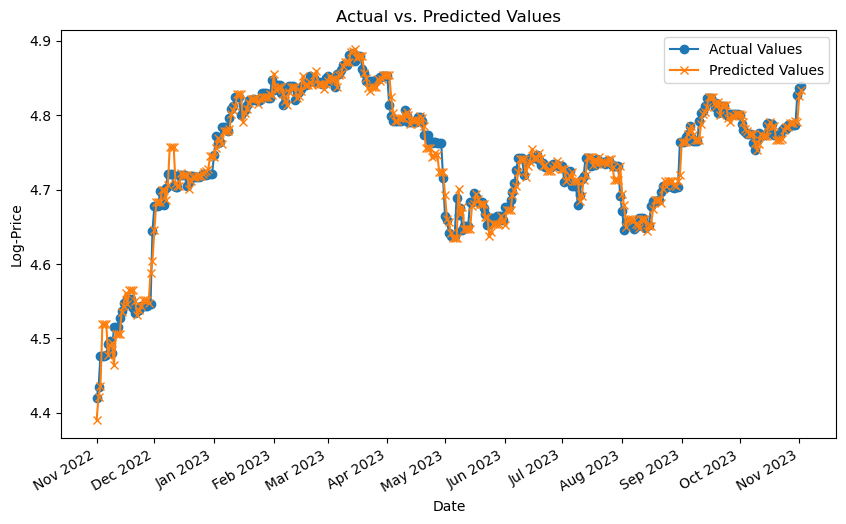

In [139]:
#Front-month

y_test_front.index = pd.to_datetime(y_test_front.index)

dates = y_test_front.index
actual_values = y_test_front['CLOSE_x']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', marker='o')
plt.plot(dates, y_pred_front, label='Predicted Values', marker='x')

#Formatting major ticks for visibility
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

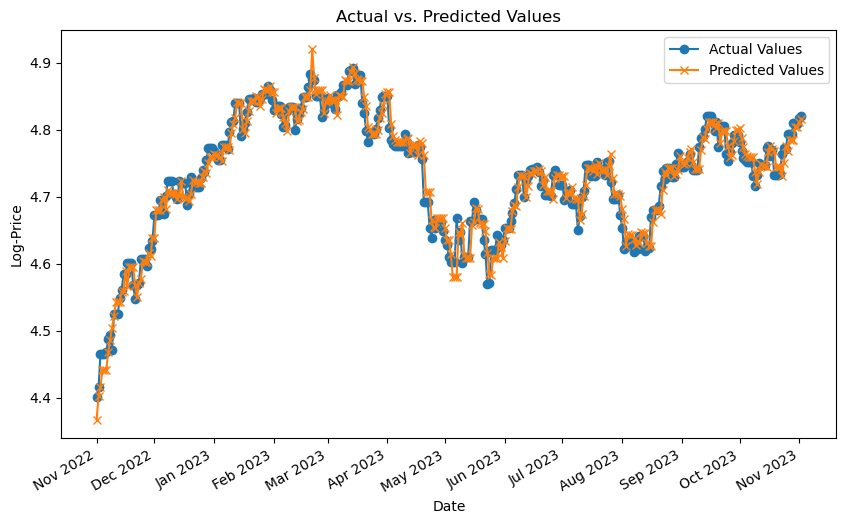

In [140]:
#Second-month

y_test_second.index = pd.to_datetime(y_test_second.index)

dates = y_test_second.index
actual_values_second = y_test_second['CLOSE_y']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values_second, label='Actual Values', marker='o')
plt.plot(dates, y_pred_second, label='Predicted Values', marker='x')

#Formatting major ticks for visibility
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

### Residual Plots

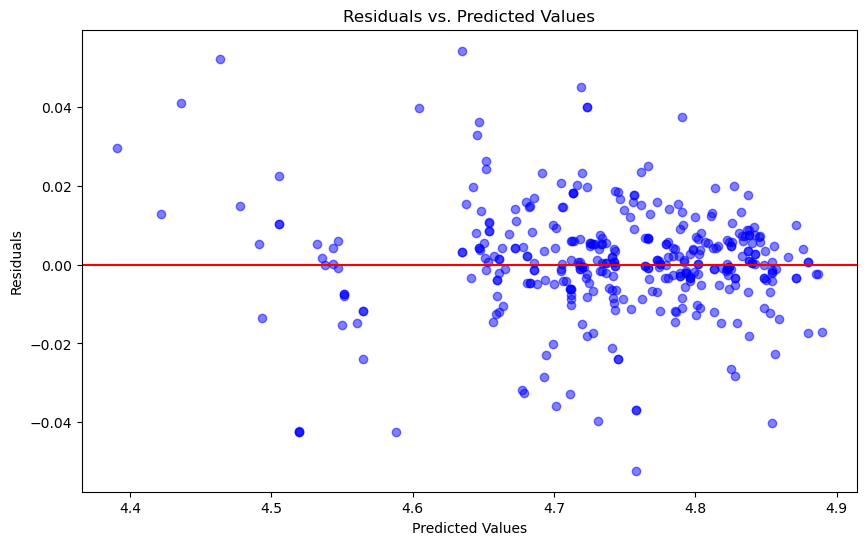

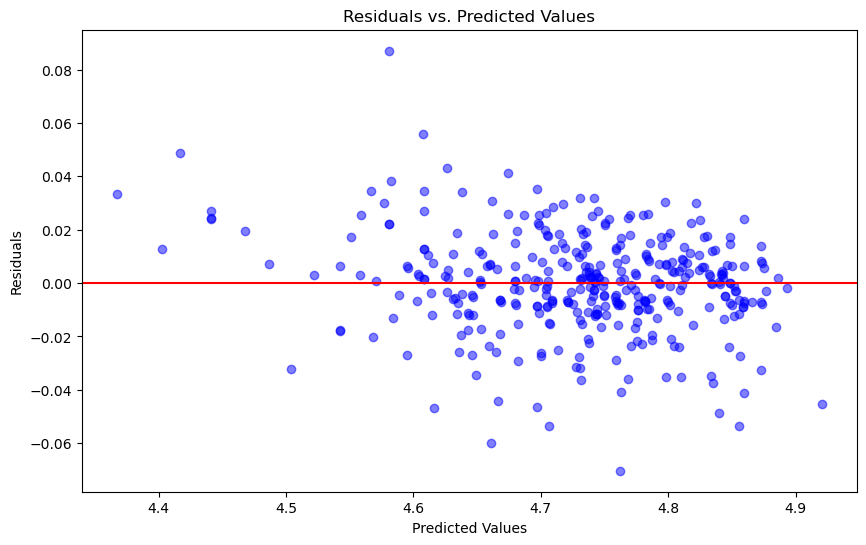

In [141]:
#Calculating residuals 
residuals_front = actual_values-y_pred_front

residuals_second = actual_values_second-y_pred_second

#Plotting residual plots

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_front, residuals_front, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_pred_second, residuals_second, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [142]:
#Saving the training results from the final LR model 

lr_front_train_results.to_csv('lr_front_train_results.csv', index=False)
lr_second_train_results.to_csv('lr_second_train_results.csv', index=False)

In [143]:
#Saving the results from the final LR model 

lr_front_results.to_csv('lr_front_final_results.csv', index=False)
lr_second_results.to_csv('lr_second_final_results.csv', index=False)

# Multiple Linear Regression - Restricted  <a class="anchor" id="MLR-restricted"></a>

In [144]:
#Loading restricted feature sets from JSON files
with open('front_month_restricted_features.json', 'r') as f:
    restricted_features_front = json.load(f)

with open('second_month_restricted_features.json', 'r') as f:
    restricted_features_second = json.load(f)

#Creating dfs with restricted features
X_train_front_mlr_restricted = X_train_front_mlr[restricted_features_front]
X_test_front_mlr_restricted = X_test_front_mlr[restricted_features_front]
X_train_second_mlr_restricted = X_train_second_mlr[restricted_features_second]
X_test_second_mlr_restricted = X_test_second_mlr[restricted_features_second]

In [145]:
#Initialising MLR
lr_front_restricted = LinearRegression()
lr_second_restricted = LinearRegression()

#Fitting
lr_front_restricted.fit(X_train_front_mlr_restricted, y_train_front_array)
lr_second_restricted.fit(X_train_second_mlr_restricted, y_train_second_array)

LinearRegression()

In [146]:
#Predictions on training data
y_train_pred_front_restricted = lr_front_restricted.predict(X_train_front_mlr_restricted)
y_train_pred_second_restricted = lr_second_restricted.predict(X_train_second_mlr_restricted)

#Predictions on test data
y_test_pred_front_restricted = lr_front_restricted.predict(X_test_front_mlr_restricted)
y_test_pred_second_restricted = lr_second_restricted.predict(X_test_second_mlr_restricted)

In [147]:
# Evaluating results

# Front-month train and test metrics
train_mae_front_restricted = mean_absolute_error(y_train_front_array, y_train_pred_front_restricted)
train_rmse_front_restricted = np.sqrt(mean_squared_error(y_train_front_array, y_train_pred_front_restricted))
train_mape_front_restricted = mean_absolute_percentage_error(y_train_front_array, y_train_pred_front_restricted)
train_r2_front_restricted = r2_score(y_train_front_array, y_train_pred_front_restricted)
train_adj_r2_front_restricted = adjusted_r2(train_r2_front_restricted, len(y_train_front_array), X_train_front_mlr_restricted.shape[1])

test_mae_front_restricted = mean_absolute_error(y_test_front_array, y_test_pred_front_restricted)
test_rmse_front_restricted = np.sqrt(mean_squared_error(y_test_front_array, y_test_pred_front_restricted))
test_mape_front_restricted = mean_absolute_percentage_error(y_test_front_array, y_test_pred_front_restricted)
test_r2_front_restricted = r2_score(y_test_front_array, y_test_pred_front_restricted)
test_adj_r2_front_restricted = adjusted_r2(test_r2_front_restricted, len(y_test_front_array), X_test_front_mlr_restricted.shape[1])

#Storing results
results_front_restricted = {
    'Metric': ['MAE', 'RMSE', 'MAPE', 'R-squared', 'Adjusted R-squared'],
    'Train': [train_mae_front_restricted, train_rmse_front_restricted, train_mape_front_restricted, train_r2_front_restricted, train_adj_r2_front_restricted],
    'Test': [test_mae_front_restricted, test_rmse_front_restricted, test_mape_front_restricted, test_r2_front_restricted, test_adj_r2_front_restricted]
}

#Second-month train and test metrics
train_mae_second_restricted = mean_absolute_error(y_train_second_array, y_train_pred_second_restricted)
train_rmse_second_restricted = np.sqrt(mean_squared_error(y_train_second_array, y_train_pred_second_restricted))
train_mape_second_restricted = mean_absolute_percentage_error(y_train_second_array, y_train_pred_second_restricted)
train_r2_second_restricted = r2_score(y_train_second_array, y_train_pred_second_restricted)
train_adj_r2_second_restricted = adjusted_r2(train_r2_second_restricted, len(y_train_second_array), X_train_second_mlr_restricted.shape[1])

test_mae_second_restricted = mean_absolute_error(y_test_second_array, y_test_pred_second_restricted)
test_rmse_second_restricted = np.sqrt(mean_squared_error(y_test_second_array, y_test_pred_second_restricted))
test_mape_second_restricted = mean_absolute_percentage_error(y_test_second_array, y_test_pred_second_restricted)
test_r2_second_restricted = r2_score(y_test_second_array, y_test_pred_second_restricted)
test_adj_r2_second_restricted = adjusted_r2(test_r2_second_restricted, len(y_test_second_array), X_test_second_mlr_restricted.shape[1])

#Storing results
results_second_restricted = {
    'Metric': ['MAE', 'RMSE', 'MAPE', 'R-squared', 'Adjusted R-squared'],
    'Train': [train_mae_second_restricted, train_rmse_second_restricted, train_mape_second_restricted, train_r2_second_restricted, train_adj_r2_second_restricted],
    'Test': [test_mae_second_restricted, test_rmse_second_restricted, test_mape_second_restricted, test_r2_second_restricted, test_adj_r2_second_restricted]
}

#Converting results  to dataframes
lr_results_front_restricted = pd.DataFrame(results_front_restricted)
lr_results_second_restricted = pd.DataFrame(results_second_restricted)

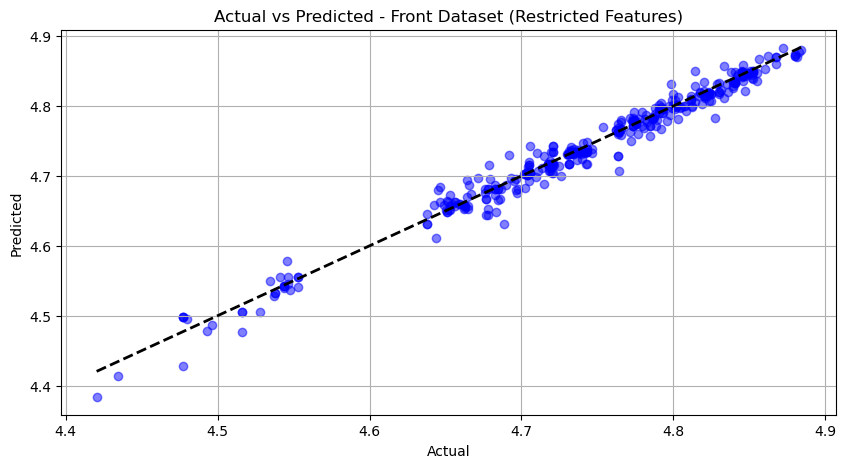

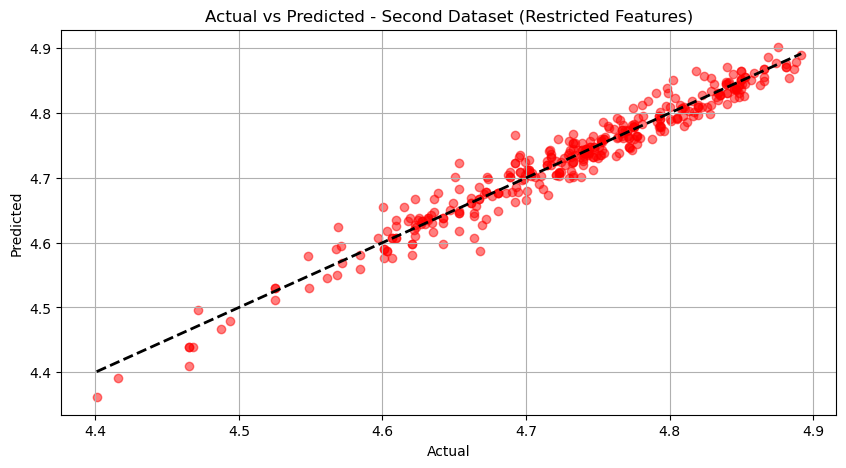

In [148]:
# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 5))
plt.scatter(y_test_front_array, y_test_pred_front_restricted, color='blue', alpha=0.5)
plt.plot([y_test_front_array.min(), y_test_front_array.max()], [y_test_front_array.min(), y_test_front_array.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Front Dataset (Restricted Features)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test_second_array, y_test_pred_second_restricted, color='red', alpha=0.5)
plt.plot([y_test_second_array.min(), y_test_second_array.max()], [y_test_second_array.min(), y_test_second_array.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Second Dataset (Restricted Features)')
plt.grid(True)
plt.show()

In [ ]:
#Saving loadings dataframes as CSV 
pca_loadings_front.to_csv('pca_loadings_front.csv', index=True)
pca_loadings_second.to_csv('pca_loadings_second.csv', index=True)

In [115]:
# Save results as CSV files
lr_results_front_restricted.to_csv('results_front_restricted_mlr.csv', index=False)
lr_results_second_restricted.to_csv('results_second_restricted_mlr.csv', index=False)